# Assignment 2


#  Data pre-processing


In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [409]:
q1_data = pd.read_csv('2-1.csv')
q2_data = pd.read_csv('2-2.csv')

In [410]:
q1_data

,type,difficulty,learned\_before,completeness,class: proper\_question
0,math,hard,yes,poor,no
1,chemistry,hard,no,good,no
2,language,hard,yes,good,yes
3,language,medium,no,poor,yes
4,math,easy,yes,poor,yes
5,language,easy,no,good,no
6,chemistry,easy,yes,poor,yes
7,math,medium,no,poor,no
8,math,easy,yes,poor,yes
9,chemistry,medium,no,poor,yes


# **Q1 (a)**



In [411]:
# create a decision tree classifier using information gain, min_samples_split = 4, random_state = 1
clf = DecisionTreeClassifier(
    criterion = 'entropy',
    min_samples_split = 4,
    random_state = 1
)

In [412]:
# onehot encoding
enc = OneHotEncoder(
    handle_unknown = 'ignore',
    drop = "if_binary"
)
enc.fit(q1_data)
q1_data = enc.transform(q1_data).toarray()
q1_data = pd.DataFrame(q1_data)
q1_data.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [413]:
enc.get_feature_names_out()

array(['type_chemistry', 'type_language', 'type_math', 'difficulty_easy',
       'difficulty_hard', 'difficulty_medium', 'learned\\_before_yes',
       'completeness_poor', 'class: proper\\_question_yes'], dtype=object)

In [414]:
# separate X and Y
X = q1_data.iloc[:, 0:8]
Y = q1_data.iloc[:, 8]

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [415]:
# fit the model
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=1)

In [416]:
# calculate the training and testing accuracy
print('Training Accuracy: ', accuracy_score(Y_train, clf.predict(X_train)))
print('Testing Accuracy: ', accuracy_score(Y_test, clf.predict(X_test)))

Training Accuracy:  0.7
Testing Accuracy:  0.5


c:\Users\fongc\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


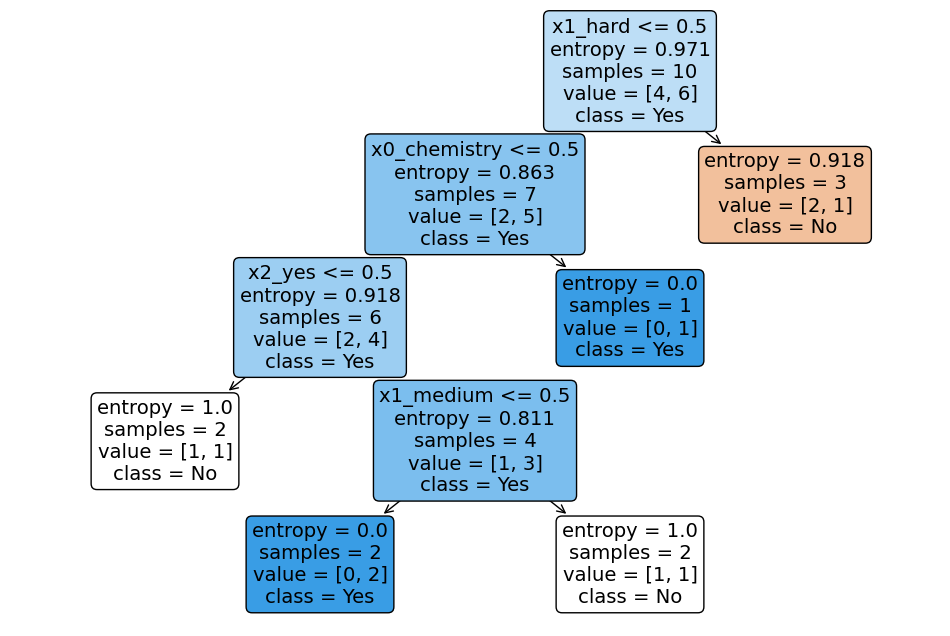

In [417]:
plt.figure(figsize = (12, 8))
plot_tree(clf, filled = True, rounded = True, feature_names = enc.get_feature_names(), class_names = ['No', 'Yes'])
plt.show()

# **Q1 (b)**


In [418]:
# vary `min_test_split` from 2 to 9 and plot the training and testing accuracy
train_acc = []
test_acc = []
for i in range(2, 10):
    clf = DecisionTreeClassifier(
        criterion = 'entropy',
        min_samples_split = i,
        random_state = 1
    )
    clf.fit(X_train, Y_train)
    train_acc.append(accuracy_score(Y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(Y_test, clf.predict(X_test)))

print(train_acc)
print(test_acc)

[1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


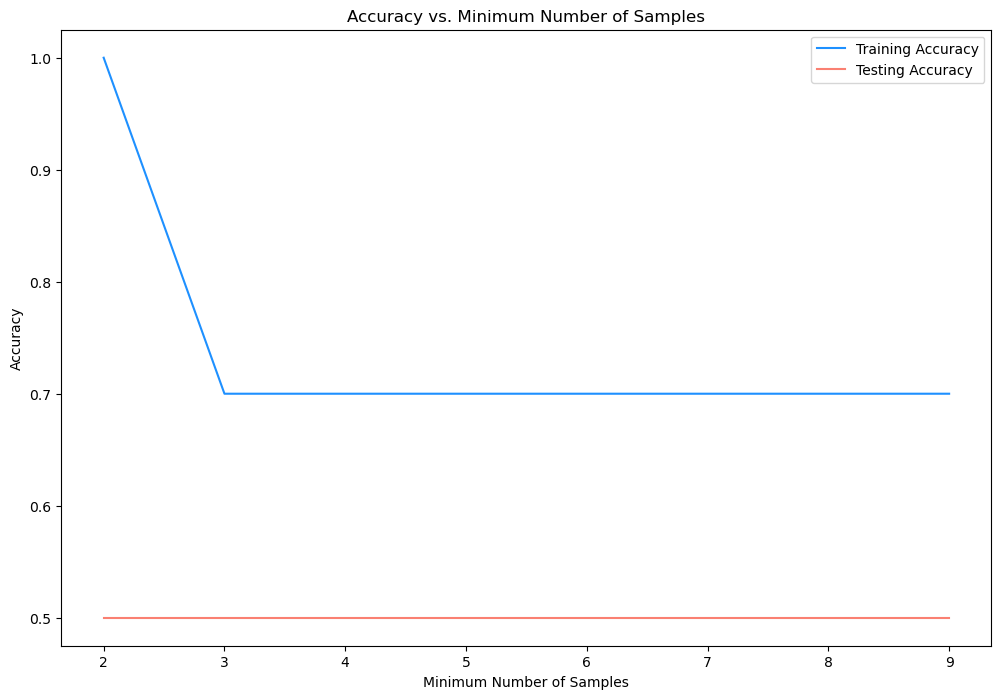

In [419]:
# plot the training and testing accuracy
plt.figure(figsize = (12, 8))
plt.plot(range(2, 10), train_acc, label = 'Training Accuracy', c = "dodgerblue")
plt.plot(range(2, 10), test_acc, label = 'Testing Accuracy', c = "salmon")
plt.title("Accuracy vs. Minimum Number of Samples")
plt.xlabel("Minimum Number of Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Q1 (c)**

In [420]:
# repeat for Gini index
clf = DecisionTreeClassifier(
    criterion = 'gini',
    min_samples_split = 4,
    random_state = 1
)

In [421]:
# fit the model
clf.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=1)

In [422]:
# calculate the training and testing accuracy
print('Training Accuracy: ', accuracy_score(Y_train, clf.predict(X_train)))
print('Testing Accuracy: ', accuracy_score(Y_test, clf.predict(X_test)))

Training Accuracy:  0.7
Testing Accuracy:  0.25


c:\Users\fongc\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


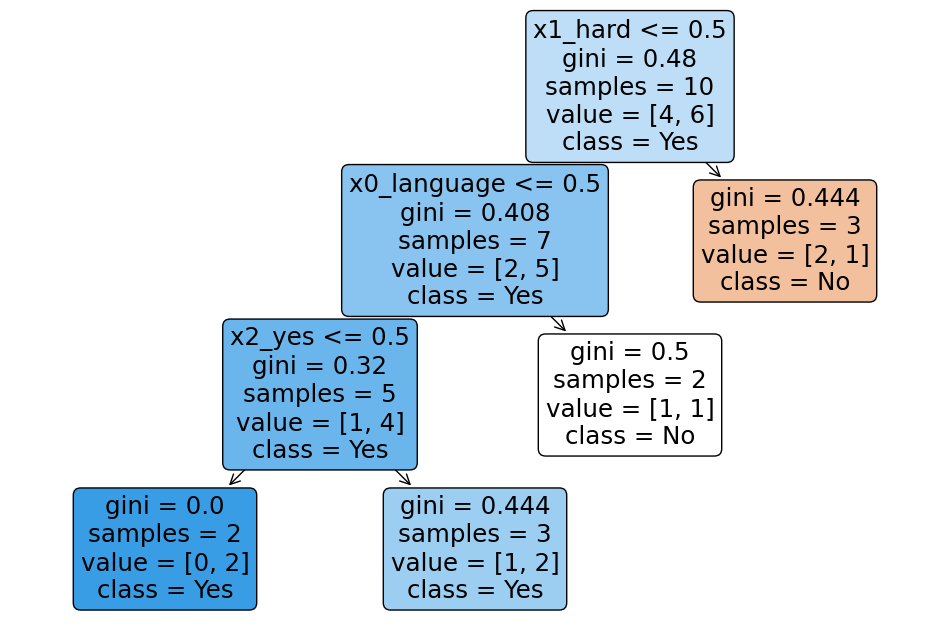

In [423]:
# plot the decision tree
plt.figure(figsize = (12, 8))
plot_tree(clf, filled = True, rounded = True, feature_names = enc.get_feature_names(), class_names = ['No', 'Yes'])
plt.show()

# **Q1 (d)**

Calculation found in the report.

In [431]:
import math

In [449]:
def calculate_entropy(mag_a, mag_b, total):
    p_a = mag_a / total
    p_b = mag_b / total
    return -p_a * math.log2(p_a) - p_b * math.log2(p_b)

In [428]:
# load Q1 dataset again
q1_data = pd.read_csv('2-1.csv')
q1_data.head(15)

,type,difficulty,learned\_before,completeness,class: proper\_question
0,math,hard,yes,poor,no
1,chemistry,hard,no,good,no
2,language,hard,yes,good,yes
3,language,medium,no,poor,yes
4,math,easy,yes,poor,yes
5,language,easy,no,good,no
6,chemistry,easy,yes,poor,yes
7,math,medium,no,poor,no
8,math,easy,yes,poor,yes
9,chemistry,medium,no,poor,yes


In [468]:
q1_data[q1_data['type'] == 'language']

,type,difficulty,learned\_before,completeness,class: proper\_question
2,language,hard,yes,good,yes
3,language,medium,no,poor,yes
5,language,easy,no,good,no
10,language,medium,yes,good,yes


In [465]:
calculate_entropy(1, 3, 4)

0.8112781244591328

In [450]:
no = len(q1_data[q1_data.iloc[:, 4] == 'no'])
yes = len(q1_data[q1_data.iloc[:, 4] == 'yes'])

# calculate overall entropy
entropy = - (no / (no + yes)) * math.log2(no / (no + yes)) - (yes / (no + yes)) * math.log2(yes / (no + yes))
print(entropy)

0.9402859586706311


In [476]:
total_gain = {}
for col in list(q1_data.columns)[:-1]:
    attribute_gain = []
    for val in q1_data[col].unique():
        temp = q1_data[q1_data[col] == val]
        attribute_gain.append((calculate_entropy(len(temp[temp.iloc[:, 4] == 'no']), len(temp[temp.iloc[:, 4] == 'yes']), len(temp)), len(temp)))
    total_gain[col] = entropy - sum(x[0] * x[1] / len(q1_data) for x in attribute_gain)
print(total_gain)

{'type': 0.04812703040826949, 'difficulty': 0.02922256565895487, 'learned\\_before': 0.04812703040826949, 'completeness': 0.003184853044648994}


In [481]:
max(total_gain, key = total_gain.get)

'type'

# **Q1 (e)**

Calculation found in the report.

# **Q1 (f)**

Calculation found in the report.

# **Q2 (a)**

In [492]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [493]:
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(q2_data['text'], q2_data['sentiment'], random_state=1)

In [507]:
# learn a Naive Bayes model without Laplacian correction
vect = CountVectorizer(stop_words = "english", binary = True)
X_train = vect.fit_transform(X_train_text)
X_test = vect.transform(X_test_text)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# calculate the training and testing accuracy
print('Training Accuracy: ', accuracy_score(y_train, bnb.predict(X_train)))
print('Testing Accuracy: ', accuracy_score(y_test, bnb.predict(X_test)))

Training Accuracy:  0.9104
Testing Accuracy:  0.83824


In [523]:
q2_data[q2_data['sentiment'] == 0].iloc[0, 0]

'For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.'

In [530]:
review_negative = "This movie was absolutely horrible! The acting was terrible and the plot was so boring. I would never recommend this movie to anyone."
review_positive = "This movie was absolutely amazing! The acting was great and the plot was so interesting. I would definitely recommend this movie to everyone."

print(bnb.predict(vect.transform([review_negative])))
print(bnb.predict(vect.transform([review_positive])))

[1]
[1]


In [529]:
# give me a list of negative words
text_negative = "movie bad not worst horrible terrible awful poor boring lame disappointing dull"

# give me a list of positive words
text_positive = "movie good best wonderful great excellent awesome amazing"

print(bnb.predict(vect.transform([text_negative])))
print(bnb.predict(vect.transform([text_positive])))

[1]
[0]


# **Q2 (b)**